# Chapter 2 - Supervised learning

Remember that supervised learning is used whenever we want to predict a certain
outcome from a given input, and we have examples of input/output pairs. We build a
machine learning model from these input/output pairs, which comprise our training
set. Our goal is to make accurate predictions for new, never-before-seen data. Supervised
learning often requires human effort to build the training set, but afterward
automates and often speeds up an otherwise laborious or infeasible task.

## Classification and Regression

In classification, the goal is to predict a class label, which is a choice from a predefined
list of possibilities.

For regression tasks, the goal is to predict a continuous number, or a floating-point
number in programming terms.

## Generalization, overfitting and underfitting

In supervised learning, we want to build a model on the training data and then be
able to make accurate predictions on new, unseen data that has the same characteristics
as the training set that we used.

If a model is able to make accurate predictions on
unseen data, we say it is able to generalize from the training set to the test set. We
want to build a model that is able to generalize as accurately as possible.

Overfitting
occurs when you fit a model too closely to the particularities of the training set and
obtain a model that works well on the training set but is not able to generalize to new
data. On the other hand, if your model is too simple—say, “Everybody who owns a
house buys a boat”—then you might not be able to capture all the aspects of and variability
in the data, and your model will do badly even on the training set. Choosing
too simple a model is called underfitting.

The more complex we allow our model to be, the better we will be able to predict on
the training data. However, if our model becomes too complex, we start focusing too
much on each individual data point in our training set, and the model will not generalize
well to new data.

There is a sweet spot in between that will yield the best generalization performance.
This is the model we want to find.

![IRIS](resources/ch_2_1.png)

## Relation of Model Complexity to Dataset Size

It’s important to note that model complexity is intimately tied to the variation of
inputs contained in your training dataset: the larger variety of data points your dataset
contains, the more complex a model you can use without overfitting. Usually, collecting
more data points will yield more variety, so larger datasets allow building
more complex models. However, simply duplicating the same data points or collecting
very similar data will not help.

Going back to the boat selling example, if we saw 10,000 more rows of customer data,
and all of them complied with the rule “If the customer is older than 45, and has less
than 3 children or is not divorced, then they want to buy a boat,” we would be much
more likely to believe this to be a good rule than when it was developed using only
the 12 rows in Table 2-1.

Having more data and building appropriately more complex models can often work
wonders for supervised learning tasks. In this book, we will focus on working with
datasets of fixed sizes. In the real world, you often have the ability to decide how
much data to collect, which might be more beneficial than tweaking and tuning your
model. Never underestimate the power of more data.

## Some Sample Datasets

We will use several datasets to illustrate the different algorithms. Some of the datasets
will be small and synthetic (meaning made-up), designed to highlight particular
aspects of the algorithms. Other datasets will be large, real-world examples.

An example of a synthetic two-class classification dataset is the forge dataset, which
has two features. The following code creates a scatter plot (Figure 2-2) visualizing all
of the data points in this dataset. The plot has the first feature on the x-axis and the
second feature on the y-axis. As is always the case in scatter plots, each data point is
represented as one dot. The color and shape of the dot indicates its class:

In [10]:
import mglearn
import matplotlib.pyplot as plt

%matplotlib inline

X.shape: (26, 2)


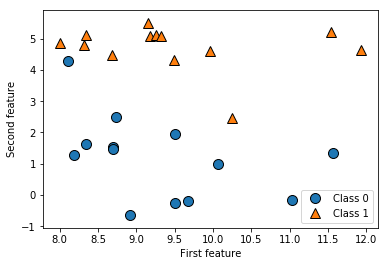

In [11]:
X, y = mglearn.datasets.make_forge()

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

As you can see from X.shape, this dataset consists of 26 data points, with 2 features.

To illustrate regression algorithms, we will use the synthetic wave dataset. The wave
dataset has a single input feature and a continuous target variable (or response) that
we want to model. The plot created here (Figure 2-3) shows the single feature on the
x-axis and the regression target (the output) on the y-axis:

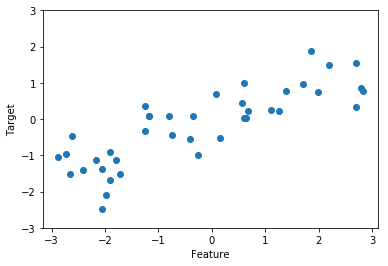

In [12]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, "o")
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

We are using these very simple, low-dimensional datasets because we can easily visualize
them—a printed page has two dimensions, so data with more than two features
is hard to show. Any intuition derived from datasets with few features (also called
low-dimensional datasets) might not hold in datasets with many features (highdimensional
datasets). As long as you keep that in mind, inspecting algorithms on
low-dimensional datasets can be very instructive.

We will complement these small synthetic datasets with two real-world datasets that
are included in scikit-learn. One is the Wisconsin Breast Cancer dataset (cancer,
for short), which records clinical measurements of breast cancer tumors. Each tumor
is labeled as “benign” (for harmless tumors) or “malignant” (for cancerous tumors),
and the task is to learn to predict whether a tumor is malignant based on the measurements
of the tissue.

In [13]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

Datasets that are included in scikit-learn are usually stored as
Bunch objects, which contain some information about the dataset
as well as the actual data. All you need to know about Bunch objects
is that they behave like dictionaries, with the added benefit that you
can access values using a dot (as in bunch.key instead of
bunch['key']).

The dataset consists of 569 data points, with 30 features each:

In [14]:
cancer.data.shape

(569, 30)

Of these 569 data points, 212 are labeled as malignant and 357 as benign:

In [16]:
import numpy as np

In [17]:
print("Sample counts per class: \n{}".format(
     {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class: 
{'malignant': 212, 'benign': 357}


To get a description of the semantic meaning of each feature, we can have a look at
the feature_names attribute:

In [18]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'], 
      dtype='<U23')

You can find out more about the data by reading cancer.DESCR if you are interested.

In [19]:
cancer.DESCR

'Breast Cancer Wisconsin (Diagnostic) Database\n=============================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance, field 3 is Mean Rad

We will also be using a real-world regression dataset, the Boston Housing dataset.
The task associated with this dataset is to predict the median value of homes in several
Boston neighborhoods in the 1970s, using information such as crime rate, proximity
to the Charles River, highway accessibility, and so on. The dataset contains 506
data points, described by 13 features:

In [20]:
from sklearn.datasets import load_boston
boston = load_boston()

In [22]:
boston.data.shape

(506, 13)

Again, you can get more information about the dataset by reading the DESCR attribute
of boston. For our purposes here, we will actually expand this dataset by not only
considering these 13 measurements as input features, but also looking at all products
(also called interactions) between features. In other words, we will not only consider
crime rate and highway accessibility as features, but also the product of crime rate
and highway accessibility. Including derived feature like these is called feature engineering,
which we will discuss in more detail in Chapter 4. This derived dataset can be
loaded using the load_extended_boston function:

In [23]:
X, y = mglearn.datasets.load_extended_boston()

In [24]:
X.shape

(506, 104)

The resulting 104 features are the 13 original features together with the 91 possible
combinations of two features within those 13. This is called the binomial coefficient, which is the number of combinations of k elements that can be selected
from a set of n elements. Often this is written as (n k)
and spoken as “n choose k”—in this case, “13 choose 2.”

## 1. k-Nearest Neighbors

The k-NN algorithm is arguably the simplest machine learning algorithm. Building
the model consists only of storing the training dataset. To make a prediction for a
new data point, the algorithm finds the closest data points in the training dataset—its
“nearest neighbors.”

### k-Neighbors classification

In its simplest version, the k-NN algorithm only considers exactly one nearest neighbor,
which is the closest training data point to the point we want to make a prediction
for. The prediction is then simply the known output for this training point.

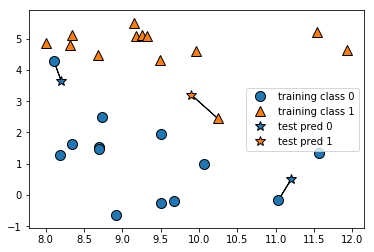

In [25]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

Here, we added three new data points, shown as stars. For each of them, we marked
the closest point in the training set. The prediction of the one-nearest-neighbor algorithm
is the label of that point (shown by the color of the cross).

Instead of considering only the closest neighbor, we can also consider an arbitrary
number, k, of neighbors. This is where the name of the k-nearest neighbors algorithm
comes from. When considering more than one neighbor, we use voting to assign a
label. This means that for each test point, we count how many neighbors belong to
class 0 and how many neighbors belong to class 1. We then assign the class that is
more frequent: in other words, the majority class among the k-nearest neighbors. The
following example (Figure 2-5) uses the three closest neighbors:

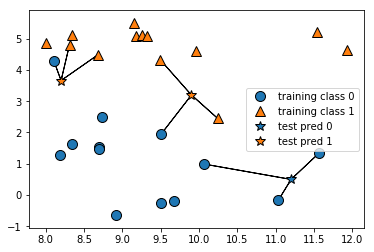

In [26]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

While this illustration is for a binary classification problem, this method can be
applied to datasets with any number of classes. For more classes, we count how many
neighbors belong to each class and again predict the most common class.

Now let’s look at how we can apply the k-nearest neighbors algorithm using scikitlearn.
First, we split our data into a training and a test set so we can evaluate generalization
performance, as discussed in Chapter 1:

In [33]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y)

Next, we import and instantiate the class. This is when we can set parameters, like the
number of neighbors to use. Here, we set it to 3:

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=3)

Now, we fit the classifier using the training set. For KNeighborsClassifier this
means storing the dataset, so we can compute neighbors during prediction:

In [38]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

To make predictions on the test data, we call the predict method. For each data point
in the test set, this computes its nearest neighbors in the training set and finds the
most common class among these:

In [39]:
knn_clf.predict(X_test)

array([1, 0, 1, 1, 1, 0, 0])

To evaluate how well our model generalizes, we can call the score method with the
test data together with the test labels:

In [40]:
knn_clf.score(X_test, y_test)

1.0

### Analyzing KNeighborsClassifier

Let’s investigate whether we can confirm the connection between model complexity
and generalization that we discussed earlier. We will do this on the real-world Breast
Cancer dataset. We begin by splitting the dataset into a training and a test set. Then we evaluate training and test set performance with different numbers of neighbors.

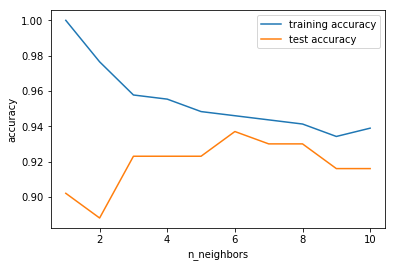

In [43]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    knn_clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_clf.fit(X_train, y_train)
    training_accuracy.append(knn_clf.score(X_train, y_train))
    test_accuracy.append(knn_clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()

The plot shows the training and test set accuracy on the y-axis against the setting of
n_neighbors on the x-axis. While real-world plots are rarely very smooth, we can still
recognize some of the characteristics of overfitting and underfitting.

Considering a single
nearest neighbor, the prediction on the training set is perfect. But when more neighbors
are considered, the model becomes simpler and the training accuracy drops. The
test set accuracy for using a single neighbor is lower than when using more neighbors,
indicating that using the single nearest neighbor leads to a model that is too
complex. On the other hand, when considering 10 neighbors, the model is too simple
and performance is even worse. The best performance is somewhere in the middle,
using around six neighbors. Still, it is good to keep the scale of the plot in mind. The
worst performance is around 88% accuracy, which might still be acceptable.

### k-neighbors regression

There is also a regression variant of the k-nearest neighbors algorithm. Again, let’s
start by using the single nearest neighbor, this time using the wave dataset. We’ve
added three test data points as green stars on the x-axis. The prediction using a single
neighbor is just the target value of the nearest neighbor. These are shown as blue stars
in Figure 2-8:

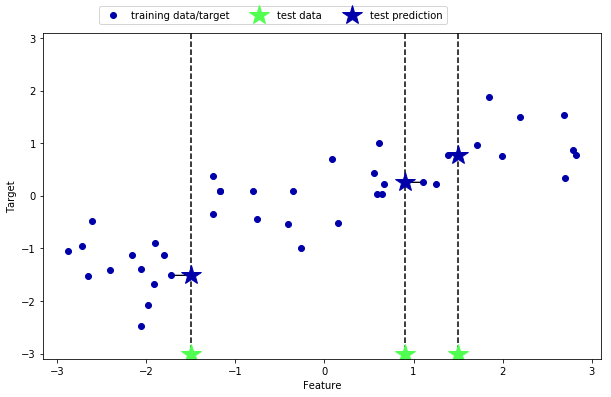

In [44]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

Again, we can use more than the single closest neighbor for regression. When using
multiple nearest neighbors, the prediction is the average, or mean, of the relevant
neighbors.

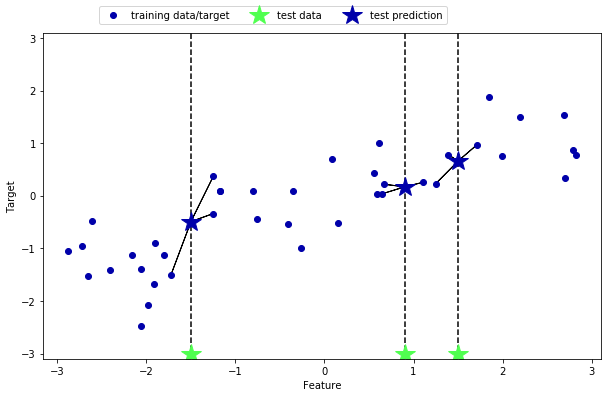

In [45]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

The k-nearest neighbors algorithm for regression is implemented in the KNeighbors
Regressor class in scikit-learn. It’s used similarly to KNeighborsClassifier:

In [47]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=66)

knn_reg = KNeighborsRegressor(n_neighbors=3)
knn_reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [48]:
knn_reg.predict(X_test)

array([-1.23423166,  0.18400081,  0.49083154, -1.23423166,  1.06165975,
        1.0717713 ,  0.230253  ,  0.230253  , -1.23751806, -0.65851598])

We can also evaluate the model using the score method, which for regressors returns
the R2 score. The R2 score, also known as the coefficient of determination, is a measure
of goodness of a prediction for a regression model, and yields a score between 0
and 1. A value of 1 corresponds to a perfect prediction, and a value of 0 corresponds
to a constant model that just predicts the mean of the training set responses, y_train:

In [49]:
knn_reg.score(X_test, y_test)

0.69680253919889323

### Analyzing KNeighborsRegressor

For our one-dimensional dataset, we can see what the predictions look like for all
possible feature values (Figure 2-10). To do this, we create a test dataset consisting of
many points on the line:

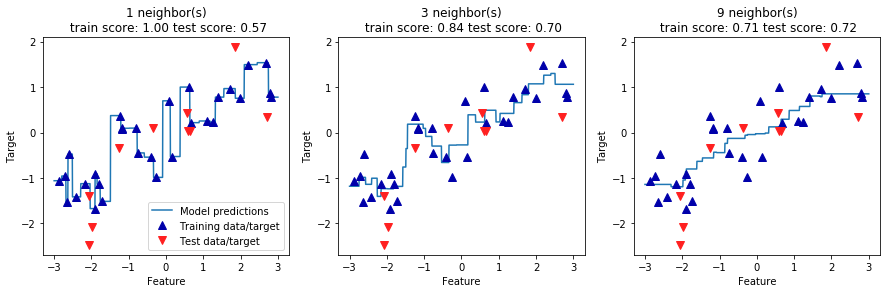

In [50]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")

As we can see from the plot, using only a single neighbor, each point in the training
set has an obvious influence on the predictions, and the predicted values go through
all of the data points. This leads to a very unsteady prediction. Considering more
neighbors leads to smoother predictions, but these do not fit the training data as well.

### Strengths, weaknesses, and parameters

In principle, there are two important parameters to the KNeighbors classifier: the
number of neighbors and how you measure distance between data points. In practice,
using a small number of neighbors like three or five often works well, but you should
certainly adjust this parameter. Choosing the right distance measure is somewhat
beyond the scope of this book. By default, Euclidean distance is used, which works
well in many settings.

One of the strengths of k-NN is that the model is very easy to understand, and often
gives reasonable performance without a lot of adjustments. Using this algorithm is a
good baseline method to try before considering more advanced techniques. Building
the nearest neighbors model is usually very fast, but when your training set is very
large (either in number of features or in number of samples) prediction can be slow.
When using the k-NN algorithm, it’s important to preprocess your data (see Chapter
3). This approach often does not perform well on datasets with many features
(hundreds or more), and it does particularly badly with datasets where most features
are 0 most of the time (so-called sparse datasets).

So, while the nearest k-neighbors algorithm is easy to understand, it is not often used
in practice, due to prediction being slow and its inability to handle many features.
The method we discuss next has neither of these drawbacks.

## 2. Linear Models

Linear models are a class of models that are widely used in practice and have been
studied extensively in the last few decades, with roots going back over a hundred
years. Linear models make a prediction using a linear function of the input features,
which we will explain shortly.

### Linear models for regression

Trying to learn the parameters w[0] and b on our one-dimensional wave dataset
might lead to the following line (see Figure 2-11):

w[0]: 0.393906  b: -0.031804


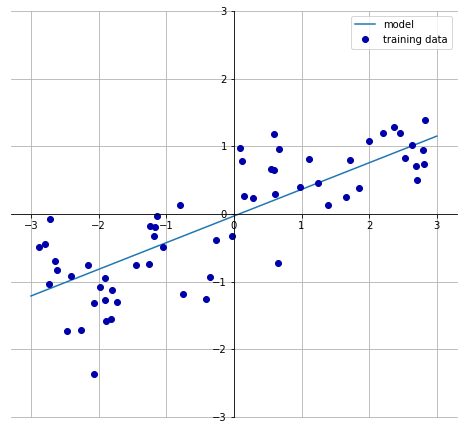

In [51]:
mglearn.plots.plot_linear_regression_wave()

We added a coordinate cross into the plot to make it easier to understand the line.
Looking at w[0] we see that the slope should be around 0.4, which we can confirm
visually in the plot. The intercept is where the prediction line should cross the y-axis:
this is slightly below zero, which you can also confirm in the image.

Linear models for regression can be characterized as regression models for which the
prediction is a line for a single feature, a plane when using two features, or a hyperplane
in higher dimensions (that is, when using more features).

If you compare the predictions made by the straight line with those made by the
KNeighborsRegressor in Figure 2-10, using a straight line to make predictions seems
very restrictive. It looks like all the fine details of the data are lost. In a sense, this is
true. It is a strong (and somewhat unrealistic) assumption that our target y is a linear combination of the features. But looking at one-dimensional data gives a somewhat
skewed perspective. For datasets with many features, linear models can be very powerful.
In particular, if you have more features than training data points, any target y
can be perfectly modeled (on the training set) as a linear function.

There are many different linear models for regression. The difference between these
models lies in how the model parameters w and b are learned from the training data,
and how model complexity can be controlled. We will now take a look at the most
popular linear models for regression.

### Linear regression (aka ordinary least squares)

Linear regression, or ordinary least squares (OLS), is the simplest and most classic linear
method for regression. Linear regression finds the parameters w and b that minimize
the mean squared error between predictions and the true regression targets, y,
on the training set. The mean squared error is the sum of the squared differences
between the predictions and the true values. Linear regression has no parameters,
which is a benefit, but it also has no way to control model complexity.

In [52]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [53]:
lin_reg = LinearRegression().fit(X_train, y_train)

The “slope” parameters (w), also called weights or coefficients, are stored in the coef_
attribute, while the offset or intercept (b) is stored in the intercept_ attribute:

In [55]:
lin_reg.intercept_

-0.031804343026759746

In [56]:
lin_reg.coef_

array([ 0.39390555])

You might notice the strange-looking trailing underscore at the end
of coef_ and intercept_. scikit-learn always stores anything
that is derived from the training data in attributes that end with a
trailing underscore. That is to separate them from parameters that
are set by the user.

The intercept_ attribute is always a single float number, while the coef_ attribute is
a NumPy array with one entry per input feature. As we only have a single input feature
in the wave dataset, lr.coef_ only has a single entry.

Let’s look at the training set and test set performance:

In [57]:
lin_reg.score(X_train, y_train)

0.67008903150757559

In [58]:
lin_reg.score(X_test, y_test)

0.65933685968637001

An R2 of around 0.66 is not very good, but we can see that the scores on the training
and test sets are very close together. This means we are likely underfitting, not overfitting.
For this one-dimensional dataset, there is little danger of overfitting, as the
model is very simple (or restricted). However, with higher-dimensional datasets
(meaning datasets with a large number of features), linear models become more powerful,
and there is a higher chance of overfitting.

Let’s take a look at how LinearRe
gression performs on a more complex dataset, like the Boston Housing dataset.
Remember that this dataset has 506 samples and 105 derived features. First, we load
the dataset and split it into a training and a test set. Then we build the linear regression
model as before:

In [60]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [61]:
lin_reg.score(X_train, y_train)

0.95235264368642392

In [62]:
lin_reg.score(X_test, y_test)

0.60577548929354275

When comparing training set and test set scores, we find that we predict very accurately
on the training set, but the R2 on the test set is much worse. This discrepancy between performance on the training set and the test set is a clear
sign of overfitting, and therefore we should try to find a model that allows us to control
complexity. One of the most commonly used alternatives to standard linear
regression is ridge regression, which we will look into next.

### Ridge regression

Ridge regression is also a linear model for regression, so the formula it uses to make
predictions is the same one used for ordinary least squares. In ridge regression,
though, the coefficients (w) are chosen not only so that they predict well on the training
data, but also to fit an additional constraint. We also want the magnitude of coefficients
to be as small as possible; in other words, all entries of w should be close to
zero. Intuitively, this means each feature should have as little effect on the outcome as
possible (which translates to having a small slope), while still predicting well. This
constraint is an example of what is called regularization. Regularization means explicitly
restricting a model to avoid overfitting. The particular kind used by ridge regression
is known as L2 regularization.

Ridge regression is implemented in linear_model.Ridge. Let’s see how well it does
on the extended Boston Housing dataset:

In [63]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [64]:
ridge_reg.score(X_train, y_train)

0.88605785603958365

In [65]:
ridge_reg.score(X_test, y_test)

0.75271396003069513

As you can see, the training set score of Ridge is lower than for LinearRegression,
while the test set score is higher. This is consistent with our expectation. With linear
regression, we were overfitting our data. Ridge is a more restricted model, so we are
less likely to overfit. A less complex model means worse performance on the training
set, but better generalization. As we are only interested in generalization performance,
we should choose the Ridge model over the LinearRegression model.

The Ridge model makes a trade-off between the simplicity of the model (near-zero
coefficients) and its performance on the training set. How much importance the
model places on simplicity versus training set performance can be specified by the
user, using the alpha parameter. In the previous example, we used the default parameter
alpha=1.0. There is no reason why this will give us the best trade-off, though.
The optimum setting of alpha depends on the particular dataset we are using.
Increasing alpha forces coefficients to move more toward zero, which decreases
training set performance but might help generalization.

In [69]:
ridge10_reg = Ridge(alpha=10)
ridge10_reg.fit(X_train, y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [77]:
ridge10_reg.intercept_, ridge10_reg.coef_

(25.008447545322632,
 array([ -8.13689900e-01,   6.47624096e-01,  -8.09069366e-01,
          3.11198225e-01,  -6.85925930e-01,   4.38593449e+00,
         -1.47445671e-01,  -2.44271803e+00,   8.46353010e-01,
         -1.14693390e+00,  -2.33238633e+00,   1.06950259e+00,
         -3.98476108e+00,  -5.96589431e-01,   2.93203629e-03,
         -5.22602899e-01,   1.40364038e-01,  -6.47904991e-01,
         -7.63479624e-01,  -7.49429425e-01,  -3.89589923e-02,
         -8.32010779e-01,  -7.54840522e-01,  -6.77354859e-01,
         -8.69619073e-01,  -3.24778913e-01,   1.27363302e+00,
         -3.37411519e-01,   6.31092531e-02,   2.37060282e-01,
          2.09823300e+00,   1.00873715e-01,  -2.79339029e-01,
          1.73132985e-01,  -3.33635214e-01,  -3.74236571e-01,
          6.98395101e-01,  -6.96346693e-01,   7.80145567e-01,
          3.74888812e-01,  -6.24706702e-01,  -7.65025367e-01,
          4.40787903e-02,  -1.04041037e+00,   4.25019292e-01,
          4.79167488e-01,  -3.84692131e-01,  -9.7

In [71]:
ridge10_reg.score(X_train, y_train)

0.78834615112332518

In [72]:
ridge10_reg.score(X_test, y_test)

0.63589673274477332

Decreasing alpha allows the coefficients to be less restricted, meaning we move right
in Figure 2-1. For very small values of alpha, coefficients are barely restricted at all,
and we end up with a model that resembles LinearRegression:

In [73]:
ridge01_reg = Ridge(alpha=0.1)
ridge01_reg.fit(X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [78]:
ridge01_reg.intercept_, ridge01_reg.coef_

(11.268837439378462,
 array([ -2.42369024e+00,  -5.44004823e+00,  -6.06891063e+00,
         -7.84388599e-01,   1.24386681e+00,   1.89702705e+01,
          4.36613313e+00,  -1.11663297e+01,   9.56288401e+00,
         -7.20754938e-01,  -5.07038511e-01,   5.97496430e+00,
         -2.73101969e+00,   6.42817641e+00,   2.24383797e-02,
         -9.60932943e-01,   4.67446373e+00,  -3.70921574e+00,
          8.83871436e-01,  -3.67984555e+00,   3.88516779e-01,
         -3.61278794e+00,  -2.60698340e+00,  -2.76742773e+00,
          6.68924851e-01,  -1.02789547e+00,   3.03954905e+00,
         -2.66446453e+00,   4.28171509e+00,  -2.96666346e+00,
          8.68755769e+00,  -3.12861379e+00,  -3.10156799e-01,
          2.19864337e+00,   3.65300578e+00,   2.28827584e+00,
         -2.81915997e+00,  -6.17005400e+00,   7.93670916e+00,
          1.65588883e+00,   8.81109066e+00,   1.15623241e+00,
          5.71139550e+00,  -4.76064030e+00,   5.09735099e+00,
          8.01852242e+00,  -8.42566476e+00,  -7.7

In [75]:
ridge01_reg.score(X_train, y_train)

0.92857820820107329

In [76]:
ridge01_reg.score(X_test, y_test)

0.77179336888449701

For now, notice how the parameter alpha corresponds to
the model complexity as shown in Figure 2-1. We will discuss methods to properly
select parameters in Chapter 5.

We can also get a more qualitative insight into how the alpha parameter changes the
model by inspecting the coef_ attribute of models with different values of alpha. A
higher alpha means a more restricted model, so we expect the entries of coef_ to
have smaller magnitude for a high value of alpha than for a low value of alpha. The coefficients for the Ridge model with alpha=1 are
somewhat larger. The dots corresponding to alpha=0.1 have larger magnitude still,
and many of the dots corresponding to linear regression without any regularization
(which would be alpha=0) are so large they are outside of the chart.

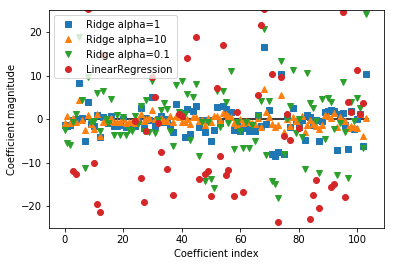

In [107]:
plt.plot(ridge_reg.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10_reg.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01_reg.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lin_reg.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lin_reg.coef_))
plt.ylim(-25, 25)
plt.legend()

Here, the x-axis enumerates the entries of coef_: x=0 shows the coefficient associated
with the first feature, x=1 the coefficient associated with the second feature, and so on
up to x=100. The y-axis shows the numeric values of the corresponding values of the
coefficients. The main takeaway here is that for alpha=10, the coefficients are mostly
between around –3 and 3. The coefficients for the Ridge model with alpha=1 are
somewhat larger. The dots corresponding to alpha=0.1 have larger magnitude still,
and many of the dots corresponding to linear regression without any regularization
(which would be alpha=0) are so large they are outside of the chart.

Another way to understand the influence of regularization is to fix a value of alpha
but vary the amount of training data available. For Figure 2-13, we subsampled the
Boston Housing dataset and evaluated LinearRegression and Ridge(alpha=1) on
subsets of increasing size (plots that show model performance as a function of dataset
size are called learning curves):

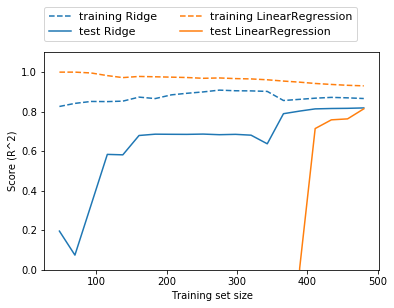

In [108]:
mglearn.plots.plot_ridge_n_samples()

As one would expect, the training score is higher than the test score for all dataset
sizes, for both ridge and linear regression. Because ridge is regularized, the training
score of ridge is lower than the training score for linear regression across the board.
However, the test score for ridge is better, particularly for small subsets of the data.
For less than 400 data points, linear regression is not able to learn anything. As more
and more data becomes available to the model, both models improve, and linear
regression catches up with ridge in the end. The lesson here is that with enough training
data, regularization becomes less important, and given enough data, ridge and linear regression will have the same performance (the fact that this happens here
when using the full dataset is just by chance). Another interesting aspect of
Figure 2-13 is the decrease in training performance for linear regression. If more data
is added, it becomes harder for a model to overfit, or memorize the data.

### Lasso

An alternative to Ridge for regularizing linear regression is Lasso. As with ridge
regression, using the lasso also restricts coefficients to be close to zero, but in a
slightly different way, called L1 regularization.8 The consequence of L1 regularization
is that when using the lasso, some coefficients are exactly zero. This means some features
are entirely ignored by the model. This can be seen as a form of automatic feature
selection. Having some coefficients be exactly zero often makes a model easier to
interpret, and can reveal the most important features of your model.

Let’s apply the lasso to the extended Boston Housing dataset:

In [80]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [81]:
lasso_reg.score(X_train, y_train)

0.29323768991114596

In [82]:
lasso_reg.score(X_test, y_test)

0.20937503255272272

In [84]:
# Number of features used.
np.sum(lasso_reg.coef_ != 0)

4

As you can see, Lasso does quite badly, both on the training and the test set. This
indicates that we are underfitting, and we find that it used only 4 of the 105 features.
Similarly to Ridge, the Lasso also has a regularization parameter, alpha, that controls
how strongly coefficients are pushed toward zero. In the previous example, we used
the default of alpha=1.0. To reduce underfitting, let’s try decreasing alpha. When we
do this, we also need to increase the default setting of max_iter (the maximum number
of iterations to run).

In [90]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001_reg = Lasso(alpha=0.01, max_iter=100000)
lasso001_reg.fit(X_train, y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [91]:
lasso001_reg.score(X_train, y_train)

0.89650695597512908

In [92]:
lasso001_reg.score(X_test, y_test)

0.76564898878435228

In [94]:
np.sum(lasso001_reg.coef_ != 0)

33

A lower alpha allowed us to fit a more complex model, which worked better on the
training and test data. The performance is slightly better than using Ridge, and we are
using only 33 of the 105 features. This makes this model potentially easier to understand.
If we set alpha too low, however, we again remove the effect of regularization and end
up overfitting, with a result similar to LinearRegression:

In [96]:
lasso00001_reg = Lasso(alpha=0.0001, max_iter=100000)
lasso00001_reg.fit(X_train, y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=100000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [99]:
lasso00001_reg.score(X_train, y_train)

0.95106104361812605

In [100]:
lasso00001_reg.score(X_test, y_test)

0.64030989941605654

In [101]:
np.sum(lasso00001_reg.coef_ != 0)

94

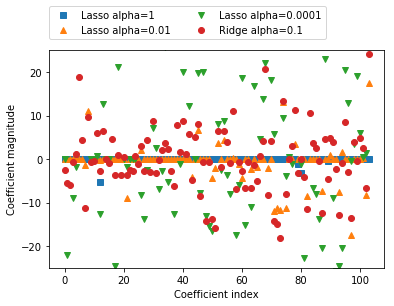

In [104]:
plt.plot(lasso_reg.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001_reg.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001_reg.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01_reg.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

For alpha=1, we not only see that most of the coefficients are zero (which we already
knew), but that the remaining coefficients are also small in magnitude. Decreasing
alpha to 0.01, we obtain the solution shown as the green dots, which causes most
features to be exactly zero. Using alpha=0.00001, we get a model that is quite unregularized,
with most coefficients nonzero and of large magnitude. For comparison, the
best Ridge solution is shown in teal. The Ridge model with alpha=0.1 has similar
predictive performance as the lasso model with alpha=0.01, but using Ridge, all coefficients
are nonzero.

In practice, ridge regression is usually the first choice between these two models.
However, if you have a large amount of features and expect only a few of them to be
important, Lasso might be a better choice. Similarly, if you would like to have a
model that is easy to interpret, Lasso will provide a model that is easier to understand,
as it will select only a subset of the input features. scikit-learn also provides
the ElasticNet class, which combines the penalties of Lasso and Ridge. In practice,
this combination works best, though at the price of having two parameters to adjust:
one for the L1 regularization, and one for the L2 regularization.

### Linear models for classification

Linear models are also extensively used for classification. Let’s look at binary classification
first. In this case, a prediction is made using the following formula:
ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b > 0

The formula looks very similar to the one for linear regression, but instead of just
returning the weighted sum of the features, we threshold the predicted value at zero.
If the function is smaller than zero, we predict the class –1; if it is larger than zero, we
predict the class +1. This prediction rule is common to all linear models for classification.
Again, there are many different ways to find the coefficients (w) and the intercept
(b).

For linear models for regression, the output, ŷ, is a linear function of the features: a
line, plane, or hyperplane (in higher dimensions). For linear models for classification,
the decision boundary is a linear function of the input. In other words, a (binary) linear
classifier is a classifier that separates two classes using a line, a plane, or a hyperplane.
We will see examples of that in this section.

There are many algorithms for learning linear models. These algorithms all differ in
the following two ways:
* The way in which they measure how well a particular combination of coefficients
and intercept fits the training data
* If and what kind of regularization they use

Different algorithms choose different ways to measure what “fitting the training set
well” means. For technical mathematical reasons, it is not possible to adjust w and b
to minimize the number of misclassifications the algorithms produce, as one might
hope. For our purposes, and many applications, the different choices for item 1 in the
preceding list (called loss functions) are of little significance.

The two most common linear classification algorithms are logistic regression, implemented
in linear_model.LogisticRegression, and linear support vector machines
(linear SVMs), implemented in svm.LinearSVC (SVC stands for support vector classifier).

We can apply the LogisticRegression and LinearSVC models to the forge dataset,
and visualize the decision boundary as found by the linear models.

In [114]:
from sklearn.linear_model import LogisticRegression
X, y = mglearn.datasets.make_forge()
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [115]:
from sklearn.svm import LinearSVC
X, y = mglearn.datasets.make_forge()
svc_clf = LinearSVC()
svc_clf.fit(X, y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

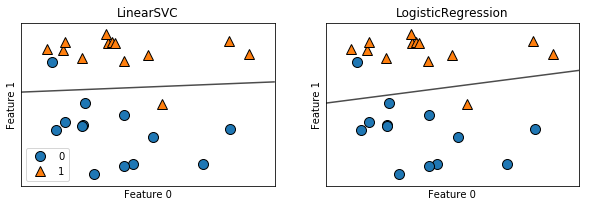

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

In this figure, we have the first feature of the forge dataset on the x-axis and the second
feature on the y-axis, as before. We display the decision boundaries found by
LinearSVC and LogisticRegression respectively as straight lines, separating the area
classified as class 1 on the top from the area classified as class 0 on the bottom. In
other words, any new data point that lies above the black line will be classified as class
1 by the respective classifier, while any point that lies below the black line will be classified
as class 0.

The two models come up with similar decision boundaries. Note that both misclassify
two of the points. By default, both models apply an L2 regularization, in the same
way that Ridge does for regression.

For LogisticRegression and LinearSVC the trade-off parameter that determines the
strength of the regularization is called C, and higher values of C correspond to less regularization. In other words, when you use a high value for the parameter C, Logis
ticRegression and LinearSVC try to fit the training set as best as possible, while with
low values of the parameter C, the models put more emphasis on finding a coefficient
vector (w) that is close to zero.

There is another interesting aspect of how the parameter C acts. Using low values of C
will cause the algorithms to try to adjust to the “majority” of data points, while using
a higher value of C stresses the importance that each individual data point be classified
correctly. Here is an illustration using LinearSVC

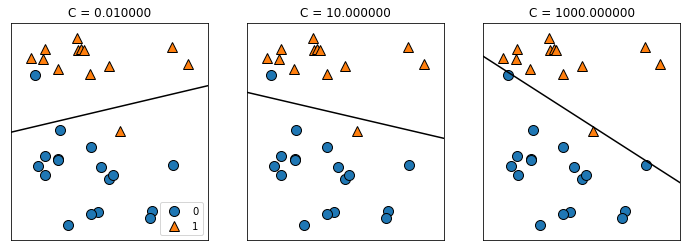

In [117]:
mglearn.plots.plot_linear_svc_regularization()

On the lefthand side, we have a very small C corresponding to a lot of regularization.
Most of the points in class 0 are at the top, and most of the points in class 1 are at the
bottom. The strongly regularized model chooses a relatively horizontal line, misclassifying
two points. In the center plot, C is slightly higher, and the model focuses more
on the two misclassified samples, tilting the decision boundary. Finally, on the righthand
side, the very high value of C in the model tilts the decision boundary a lot, now
correctly classifying all points in class 0. One of the points in class 1 is still misclassified,
as it is not possible to correctly classify all points in this dataset using a straight
line. The model illustrated on the righthand side tries hard to correctly classify all
points, but might not capture the overall layout of the classes well. In other words,
this model is likely overfitting.

Similarly to the case of regression, linear models for classification might seem very
restrictive in low-dimensional spaces, only allowing for decision boundaries that are
straight lines or planes. Again, in high dimensions, linear models for classification become very powerful, and guarding against overfitting becomes increasingly important
when considering more features.

Let’s analyze LinearLogistic in more detail on the Breast Cancer dataset:

In [118]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [119]:
log_reg.score(X_train, y_train)

0.95305164319248825

In [120]:
log_reg.score(X_test, y_test)

0.95804195804195802

The default value of C=1 provides quite good performance, with 95% accuracy on
both the training and the test set. But as training and test set performance are very
close, it is likely that we are underfitting. Let’s try to increase C to fit a more flexible
model:

In [121]:
log100_reg = LogisticRegression(C=100)
log100_reg.fit(X_train, y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [123]:
log100_reg.score(X_train, y_train)

0.971830985915493

In [124]:
log100_reg.score(X_test, y_test)

0.965034965034965

Using C=100 results in higher training set accuracy, and also a slightly increased test
set accuracy, confirming our intuition that a more complex model should perform
better.

We can also investigate what happens if we use an even more regularized model than
the default of C=1, by setting C=0.01.

In [126]:
log001_reg = LogisticRegression(C=0.01)
log001_reg.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [127]:
log001_reg.score(X_train, y_train)

0.93427230046948362

In [128]:
log001_reg.score(X_test, y_test)

0.93006993006993011

As expected, when moving more to the left along the scale shown in Figure 2-1 from
an already underfit model, both training and test set accuracy decrease relative to the
default parameters.

Finally, let’s look at the coefficients learned by the models with the three different settings
of the regularization parameter C.

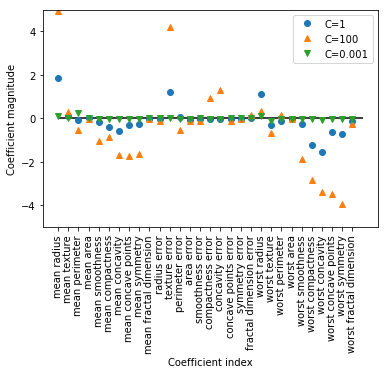

In [129]:
plt.plot(log_reg.coef_.T, 'o', label="C=1")
plt.plot(log100_reg.coef_.T, '^', label="C=100")
plt.plot(log001_reg.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

As LogisticRegression applies an L2 regularization by default,
the result looks similar to that produced by Ridge in Figure 2-12.
Stronger regularization pushes coefficients more and more toward
zero, though coefficients never become exactly zero. Inspecting the
plot more closely, we can also see an interesting effect in the third
coefficient, for “mean perimeter.” For C=100 and C=1, the coefficient
is negative, while for C=0.001, the coefficient is positive, with a
magnitude that is even larger than for C=1. Interpreting a model
like this, one might think the coefficient tells us which class a feature
is associated with. For example, one might think that a high
“texture error” feature is related to a sample being “malignant.”
However, the change of sign in the coefficient for “mean perimeter”
means that depending on which model we look at, a high “mean
perimeter” could be taken as being either indicative of “benign” or
indicative of “malignant.” This illustrates that interpretations of
coefficients of linear models should always be taken with a grain of
salt.

If we desire a more interpretable model, using L1 regularization might help, as it limits
the model to using only a few features. Here is the coefficient plot and classification
accuracies for L1 regularization (Figure 2-18):

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


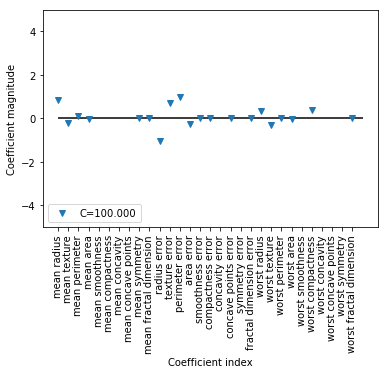

In [130]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.ylim(-5, 5)
plt.legend(loc=3)

As you can see, there are many parallels between linear models for binary classification
and linear models for regression. As in regression, the main difference between
the models is the penalty parameter, which influences the regularization and
whether the model will use all available features or select only a subset.